# 1. IMPORT PACKAGE

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. IMPORT DATA OP BANGUNAN SPPT

**A. Import data *cut off* 08 Juli 2022**

In [ ]:
op_bangunan = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Junior DS/Data_01-09-2022/OP_BANGUNAN_202207082007.csv')
op_bangunan

In [4]:
op_bangunan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064500 entries, 0 to 2064499
Data columns (total 31 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   NOP                         object 
 2   Jml_Lantai_Bng              int64  
 3   Jns_Atap_Bng                float64
 4   Jns_Konstruksi_Bng          float64
 5   Jns_Transaksi_Bng           int64  
 6   Kd_Blok                     int64  
 7   Kd_Dati2                    int64  
 8   Kd_Dinding                  float64
 9   Kd_Jns_Op                   int64  
 10  Kd_Jpb                      int64  
 11  Kd_Kecamatan                int64  
 12  Kd_Kelurahan                int64  
 13  Kd_Langit_Langit            object 
 14  Kd_Lantai                   float64
 15  Kd_Propinsi                 int64  
 16  Kd_Unit                     float64
 17  Kondisi_Bng                 int64  
 18  Luas_Bng                    int64  
 19  Nilai_Sistem_Bng     

Menghitung jumlah data

In [5]:
total_row_1 = len(op_bangunan.index)
print(total_row_1)

2064500


**B. Import data *cut off* 15 September 2022**

In [ ]:
op_bang = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Junior DS/Data_06-10-2022/OP_BANGUNAN_20220915.csv')
op_bang

In [7]:
op_bang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072586 entries, 0 to 2072585
Data columns (total 31 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   Jml_Lantai_Bng              int64  
 2   Jns_Atap_Bng                float64
 3   Jns_Konstruksi_Bng          float64
 4   Jns_Transaksi_Bng           int64  
 5   Kd_Blok                     int64  
 6   Kd_Dati2                    int64  
 7   Kd_Dinding                  float64
 8   Kd_Jns_Op                   int64  
 9   Kd_Jpb                      int64  
 10  Kd_Kecamatan                int64  
 11  Kd_Kelurahan                int64  
 12  Kd_Langit_Langit            object 
 13  Kd_Lantai                   float64
 14  Kd_Propinsi                 int64  
 15  Kd_Unit                     float64
 16  Kondisi_Bng                 int64  
 17  Luas_Bng                    int64  
 18  Nilai_Sistem_Bng            float64
 19  Nip_Pemeriksa_Bng    

Menghitung jumlah data

In [8]:
total_row_2 = len(op_bang.index)
print(total_row_2)

2072586


Menghitung selisih data lama dengan terupdate

In [9]:
selisih_cutoff = total_row_2 - total_row_1
print('Selisih Cut Off: \n', total_row_2, '-', total_row_1, '=', selisih_cutoff)

Selisih Cut Off: 
 2072586 - 2064500 = 8086


# 3. SUBSET DATA

**A. Mengubah isian Kd_Dati2 dan Kd_Jpb**

In [ ]:
op_bang['Kd_Dati2'].replace(to_replace= [71,72,73,74,75,76]
                                ,value=['Jakarta Selatan','Jakarta Timur','Jakarta Pusat',
                                        'Jakarta Barat','Jakarta Utara','Kepulauan Seribu'], inplace=True)

op_bang['Kd_Jpb'].replace(to_replace= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0,17],
                              value=['Perumahan','Perkantoran Swasta','Pabrik','Toko/Apotek/Pasar/Ruko','Rumah sakit/Klinik','Olahraga/Rekreasi',
                                     'Hotel/Wisma','Bengkel/Gudang/Pertanian','Gedung Pemerintah'
                                     ,'Lain-lain','Bangunan tidak kena pajak','Bangunan parkir','Apartemen','Pompa Bensin','Tangki Minyak','Gedung Sekolah',
                                     'Anomali','Anomali'], inplace=True)
op_bang

**B. Exclude data Kepulauan Seribu**

In [ ]:
op_bang = op_bang[op_bang['Kd_Dati2']!='Kepulauan Seribu']
op_bang

# 4. EDA JUMLAH LANTAI BANGUNAN

**A. Define dan pengelompokan lantai bangunan**

In [5]:
op_bang['Ket_Lan'] = np.where(op_bang['Jml_Lantai_Bng']<1, 'Bangunan Basement', '')
op_bang['Ket_Lan'] = np.where(op_bang['Jml_Lantai_Bng']==0, 'Bangunan Tak Beratap', '')
op_bang['Ket_Lan'] = np.where(op_bang['Jml_Lantai_Bng']==1, 'Bangunan Tidak Tingkat', op_bang['Ket_Lan'])
op_bang['Ket_Lan'] = np.where((op_bang['Jml_Lantai_Bng']>1)&(op_bang['Jml_Lantai_Bng']<=10), 'Bangunan Tingkat < 10', op_bang['Ket_Lan'])
op_bang['Ket_Lan'] = np.where((op_bang['Jml_Lantai_Bng']>10)&(op_bang['Jml_Lantai_Bng']<=50), 'Bangunan Tingkat < 50', op_bang['Ket_Lan'])
op_bang['Ket_Lan'] = np.where((op_bang['Jml_Lantai_Bng']>50)&(op_bang['Jml_Lantai_Bng']<=69), 'Bangunan Tingkat < 69', op_bang['Ket_Lan'])
op_bang['Ket_Lan'] = np.where(op_bang['Jml_Lantai_Bng']>69, 'Bangunan Tingkat > 69', op_bang['Ket_Lan'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8776\1346067536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op_bang['Ket_Lan'] = np.where(op_bang['Jml_Lantai_Bng']<1, 'Bangunan Basement', '')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8776\1346067536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op_bang['Ket_Lan'] = np.where(op_bang['Jml_Lantai_Bng']==1, 'Bangunan Tidak Tingkat', op_bang['Ket_Lan'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8776\1346067536.py:6: SettingWithCopyWarning: 
A value is

In [6]:
ketlan_count = op_bang.groupby(['Kd_Dati2', 'Ket_Lan']).size().reset_index(name='ketlan_count')
ketlan_count

,Kd_Dati2,Ket_Lan,ketlan_count
0,Jakarta Barat,Bangunan Basement,97
1,Jakarta Barat,Bangunan Tidak Tingkat,306079
2,Jakarta Barat,Bangunan Tingkat < 10,161354
3,Jakarta Barat,Bangunan Tingkat < 50,4949
4,Jakarta Barat,Bangunan Tingkat < 69,2
5,Jakarta Barat,Bangunan Tingkat > 69,17
6,Jakarta Pusat,Bangunan Basement,3
7,Jakarta Pusat,Bangunan Tidak Tingkat,134269
8,Jakarta Pusat,Bangunan Tingkat < 10,99688
9,Jakarta Pusat,Bangunan Tingkat < 50,44608


**B. Visualisasi EDA jumlah lantai bangunan dengan bar plot**

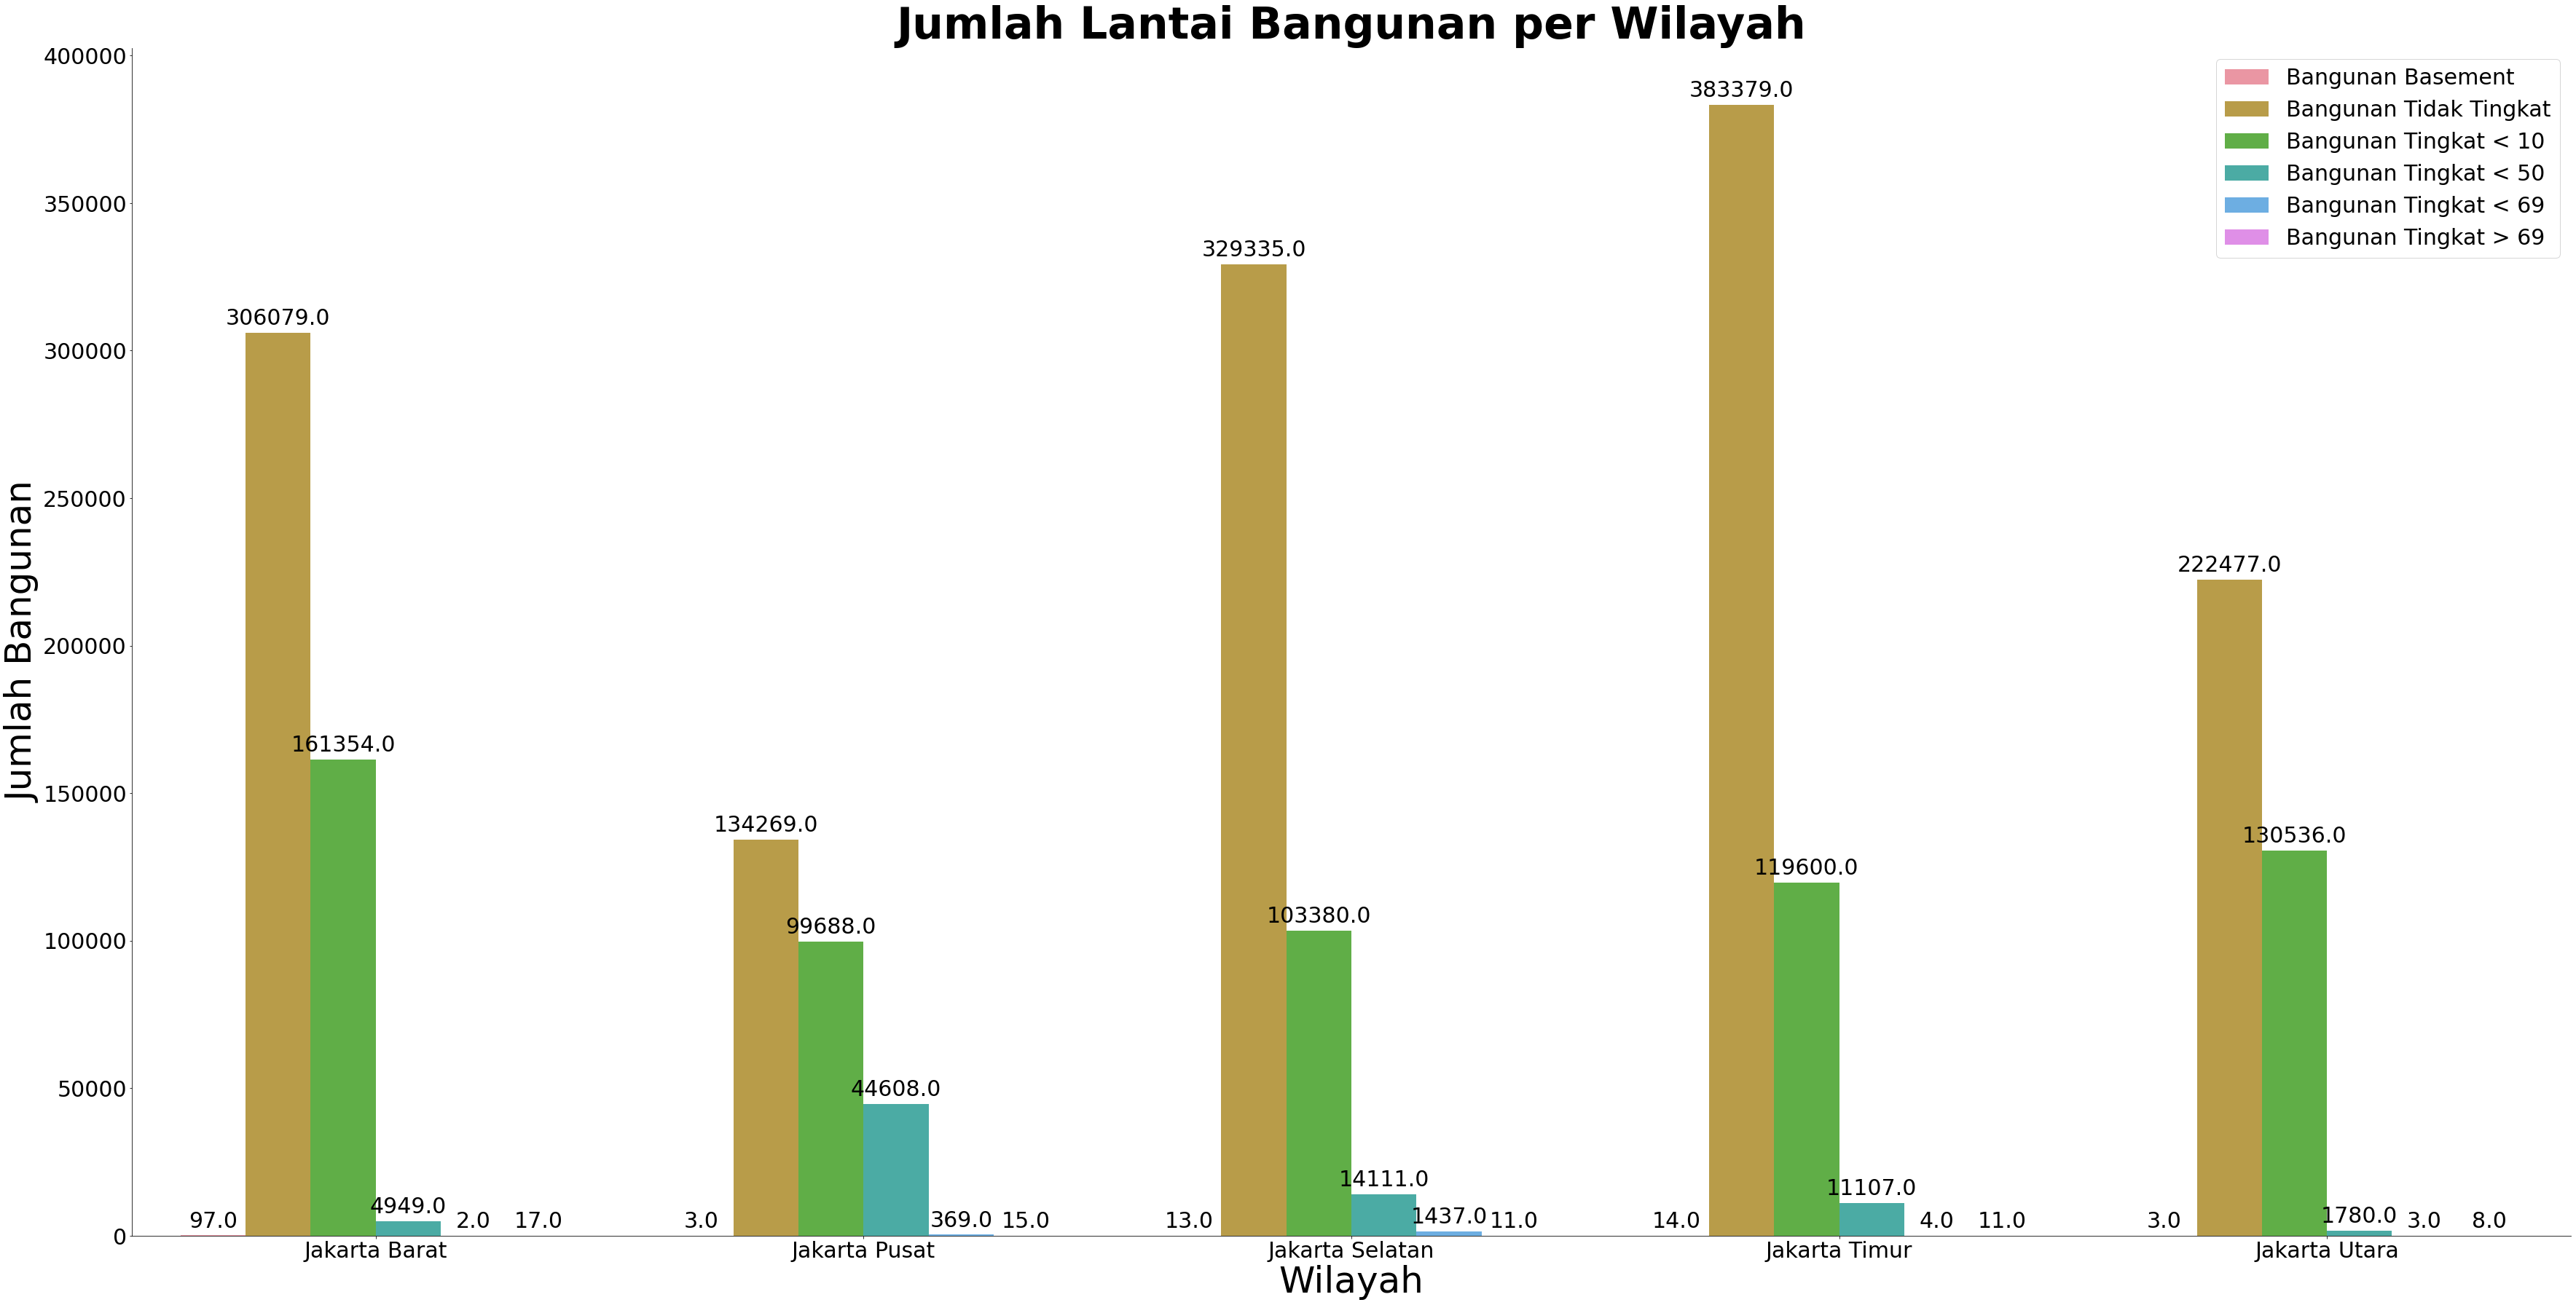

In [45]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(60, 30))

# grouped barplot
ax = sns.barplot(
    x="Kd_Dati2", 
    y="ketlan_count", 
    hue="Ket_Lan", 
    data=ketlan_count,
    ci=None
    )

# Customize the axes and title
ax.set_title("Jumlah Lantai Bangunan per Wilayah", fontsize='60', fontweight='bold')
ax.set_xlabel("Wilayah", fontsize='50')
ax.set_ylabel("Jumlah Bangunan", fontsize='50')

plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

plt.legend(fontsize = 30)

# ax.legend.set_title('Kategori Lantai Bangunan')

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            fontsize='30',
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            rotation = 0,
            horizontalalignment='right',# Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

**C. Visualisasi EDA sample jumlah lantai bangunan dengan density plot**

<AxesSubplot:xlabel='Jml_Lantai_Bng', ylabel='Density'>

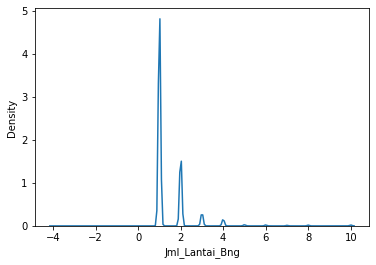

In [7]:
op_bang_2 = op_bang[op_bang['Jml_Lantai_Bng']<=10]
sns.kdeplot(op_bang_2['Jml_Lantai_Bng'])

# 5. EDA JENIS PENGGUNAAN BANGUNAN

**A. Grouping jenis penggunaan bangunan dengan jumlah per jenis penggunaan dan wilayah**

In [7]:
jpb_count = op_bang.groupby(['Kd_Dati2', 'Kd_Jpb']).size().reset_index(name='jpb_count')
jpb_count

,Kd_Dati2,Kd_Jpb,jpb_count
0,Jakarta Barat,Anomali,96
1,Jakarta Barat,Apartemen,46873
2,Jakarta Barat,Bangunan parkir,58
3,Jakarta Barat,Bangunan tidak kena pajak,1548
4,Jakarta Barat,Bengkel/Gudang/Pertanian,3113
...,...,...,...
77,Jakarta Utara,Perumahan,246762
78,Jakarta Utara,Pompa Bensin,53
79,Jakarta Utara,Rumah sakit/Klinik,88
80,Jakarta Utara,Tangki Minyak,335


**B. EDA jenis penggunaan bangunan dalam bentuk bar plot**

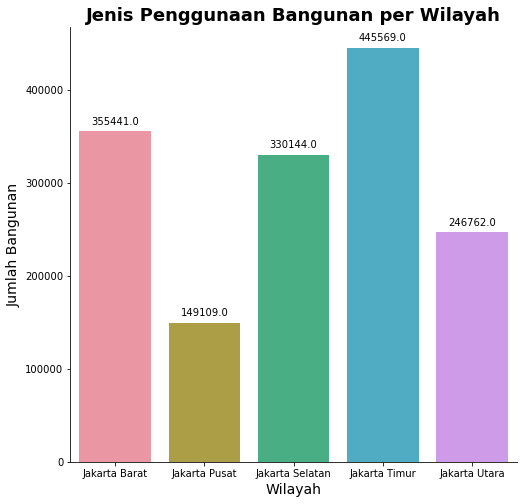

In [19]:
# Create an array with the colors you want to use
# colors = ["#69b3a2", "#4374B3"]
# sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
bx = sns.barplot(
    x="Kd_Dati2", 
    y="jpb_count",  
    data=perum, 
    ci=None
    )

# Customize the axes and title
bx.set_title("Jenis Penggunaan Bangunan per Wilayah", fontsize='18', fontweight='bold')
bx.set_xlabel("Wilayah", fontsize='14')
bx.set_ylabel("Jumlah Bangunan", fontsize='14')

# plt.legend(['Kd_Dati2'], fontsize = 14)

# Remove top and right borders
bx.spines['top'].set_visible(False)
bx.spines['right'].set_visible(False)

def add_value_labels(bx, spacing=5):
    for rect in bx.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        bx.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            fontsize='10',
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            rotation = 0,
            horizontalalignment='right',# Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(bx)

**C. Subset untuk penggunaan bangunan berupa perumahan**

In [8]:
perum = jpb_count[jpb_count['Kd_Jpb']=='Perumahan']
perum

,Kd_Dati2,Kd_Jpb,jpb_count
12,Jakarta Barat,Perumahan,355441
28,Jakarta Pusat,Perumahan,149109
44,Jakarta Selatan,Perumahan,330144
61,Jakarta Timur,Perumahan,445569
77,Jakarta Utara,Perumahan,246762


In [9]:
perum = perum[['Kd_Dati2', 'jpb_count']]

**D. EDA jenis penggunaan bangunan berupa perumahan dalam bentuk bar plot**

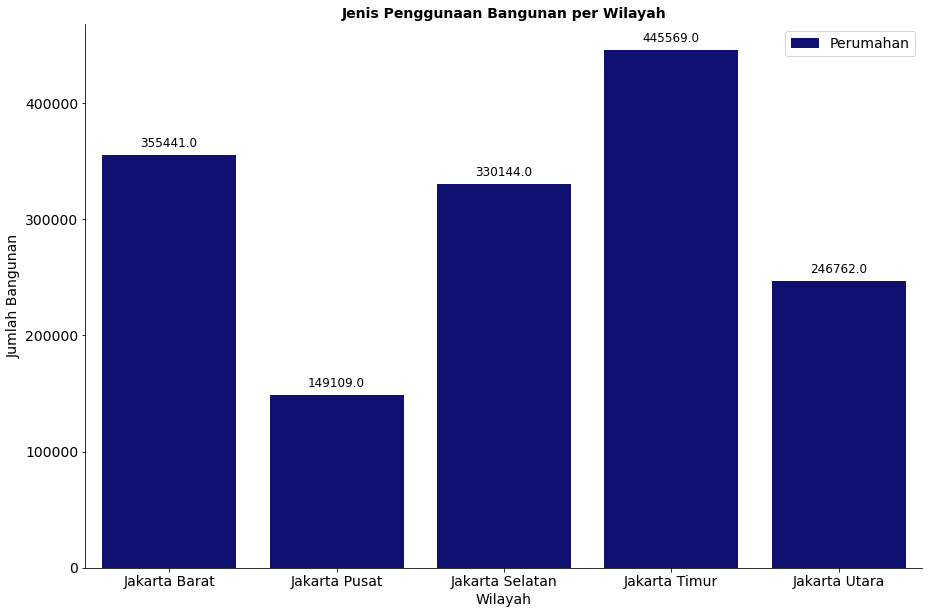

In [29]:
# perum.plot(kind = 'bar', figsize=(10, 8), color = 'navy')
# plt.title('Jenis Penggunaan Bangunan per Wilayah', fontsize='18', horizontalalignment='center')


# Set the figure size
plt.figure(figsize=(15, 10))

# grouped barplot
ax = sns.barplot(
    x="Kd_Dati2", 
    y="jpb_count",  
    data=perum, 
    ci=None,
    color = 'navy'
    )

# Customize the axes and title
ax.set_title("Jenis Penggunaan Bangunan per Wilayah", fontsize='14', fontweight='bold')
ax.set_xlabel("Wilayah", fontsize='14')
ax.set_ylabel("Jumlah Bangunan", fontsize='14')

plt.xlabel("Wilayah", fontsize=14)
plt.ylabel("Jumlah Bangunan", fontsize=14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.legend(["Perumahan"],fontsize = 14)

# ax.legend.set_title('Kategori Lantai Bangunan')

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            fontsize='12',
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            rotation = 0,
            horizontalalignment='right',# Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# plt.show()

**E. Subset dan EDA penggunaan bangunan berupa apartemen dan toko dalam bentuk bar plot**

In [46]:
nonperum_1 = jpb_count[(jpb_count['Kd_Jpb']=='Toko/Apotek/Pasar/Ruko')|(jpb_count['Kd_Jpb']=='Apartemen')]
nonperum_1

,Kd_Dati2,Kd_Jpb,jpb_count
1,Jakarta Barat,Apartemen,46873
16,Jakarta Barat,Toko/Apotek/Pasar/Ruko,53003
17,Jakarta Pusat,Apartemen,40028
32,Jakarta Pusat,Toko/Apotek/Pasar/Ruko,75743
33,Jakarta Selatan,Apartemen,60311
48,Jakarta Selatan,Toko/Apotek/Pasar/Ruko,41684
50,Jakarta Timur,Apartemen,17485
65,Jakarta Timur,Toko/Apotek/Pasar/Ruko,35257
66,Jakarta Utara,Apartemen,51394
81,Jakarta Utara,Toko/Apotek/Pasar/Ruko,44630


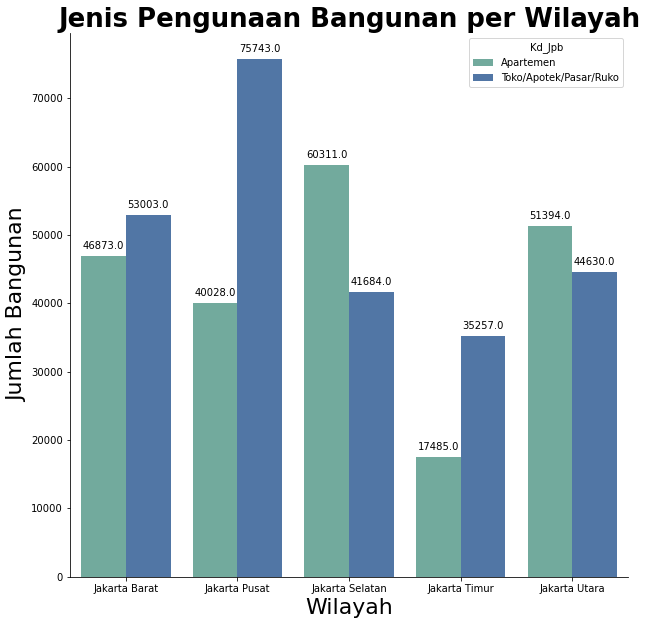

In [66]:
# # Create an array with the colors you want to use
# colors = ["#69b3a2", "#4374B3"]
# sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(10, 10))

# grouped barplot
cx = sns.barplot(
    x="Kd_Dati2", 
    y="jpb_count", 
    hue="Kd_Jpb", 
    data=nonperum_1,
    ci=None
    )

# Customize the axes and title
cx.set_title("Jenis Pengunaan Bangunan per Wilayah", fontsize='26', fontweight='bold')
cx.set_xlabel("Wilayah", fontsize='22')
cx.set_ylabel("Jumlah Bangunan", fontsize='22')

# cx.legend.set_title('Kategori Lantai Bangunan')

# Remove top and right borders
cx.spines['top'].set_visible(False)
cx.spines['right'].set_visible(False)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        cx.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            fontsize='10',
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            rotation = 0,
            horizontalalignment='right',# Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(cx)

**F. Subset dan EDA penggunaan bangunan selain perumahan, apartemen, dan toko dalam bentuk bar plot**

In [29]:
nonper=jpb_count[jpb_count['Kd_Jpb']!='Perumahan']
nonapar=nonper[nonper['Kd_Jpb']!='Apartemen']
nontok= nonapar[nonapar['Kd_Jpb']!='Toko/Apotek/Pasar/Ruko']
nontok

,Kd_Dati2,Kd_Jpb,jpb_count
0,Jakarta Barat,Anomali,96
2,Jakarta Barat,Bangunan parkir,58
3,Jakarta Barat,Bangunan tidak kena pajak,1548
4,Jakarta Barat,Bengkel/Gudang/Pertanian,3113
5,Jakarta Barat,Gedung Pemerintah,178
...,...,...,...
75,Jakarta Utara,Pabrik,1544
76,Jakarta Utara,Perkantoran Swasta,3537
78,Jakarta Utara,Pompa Bensin,53
79,Jakarta Utara,Rumah sakit/Klinik,88


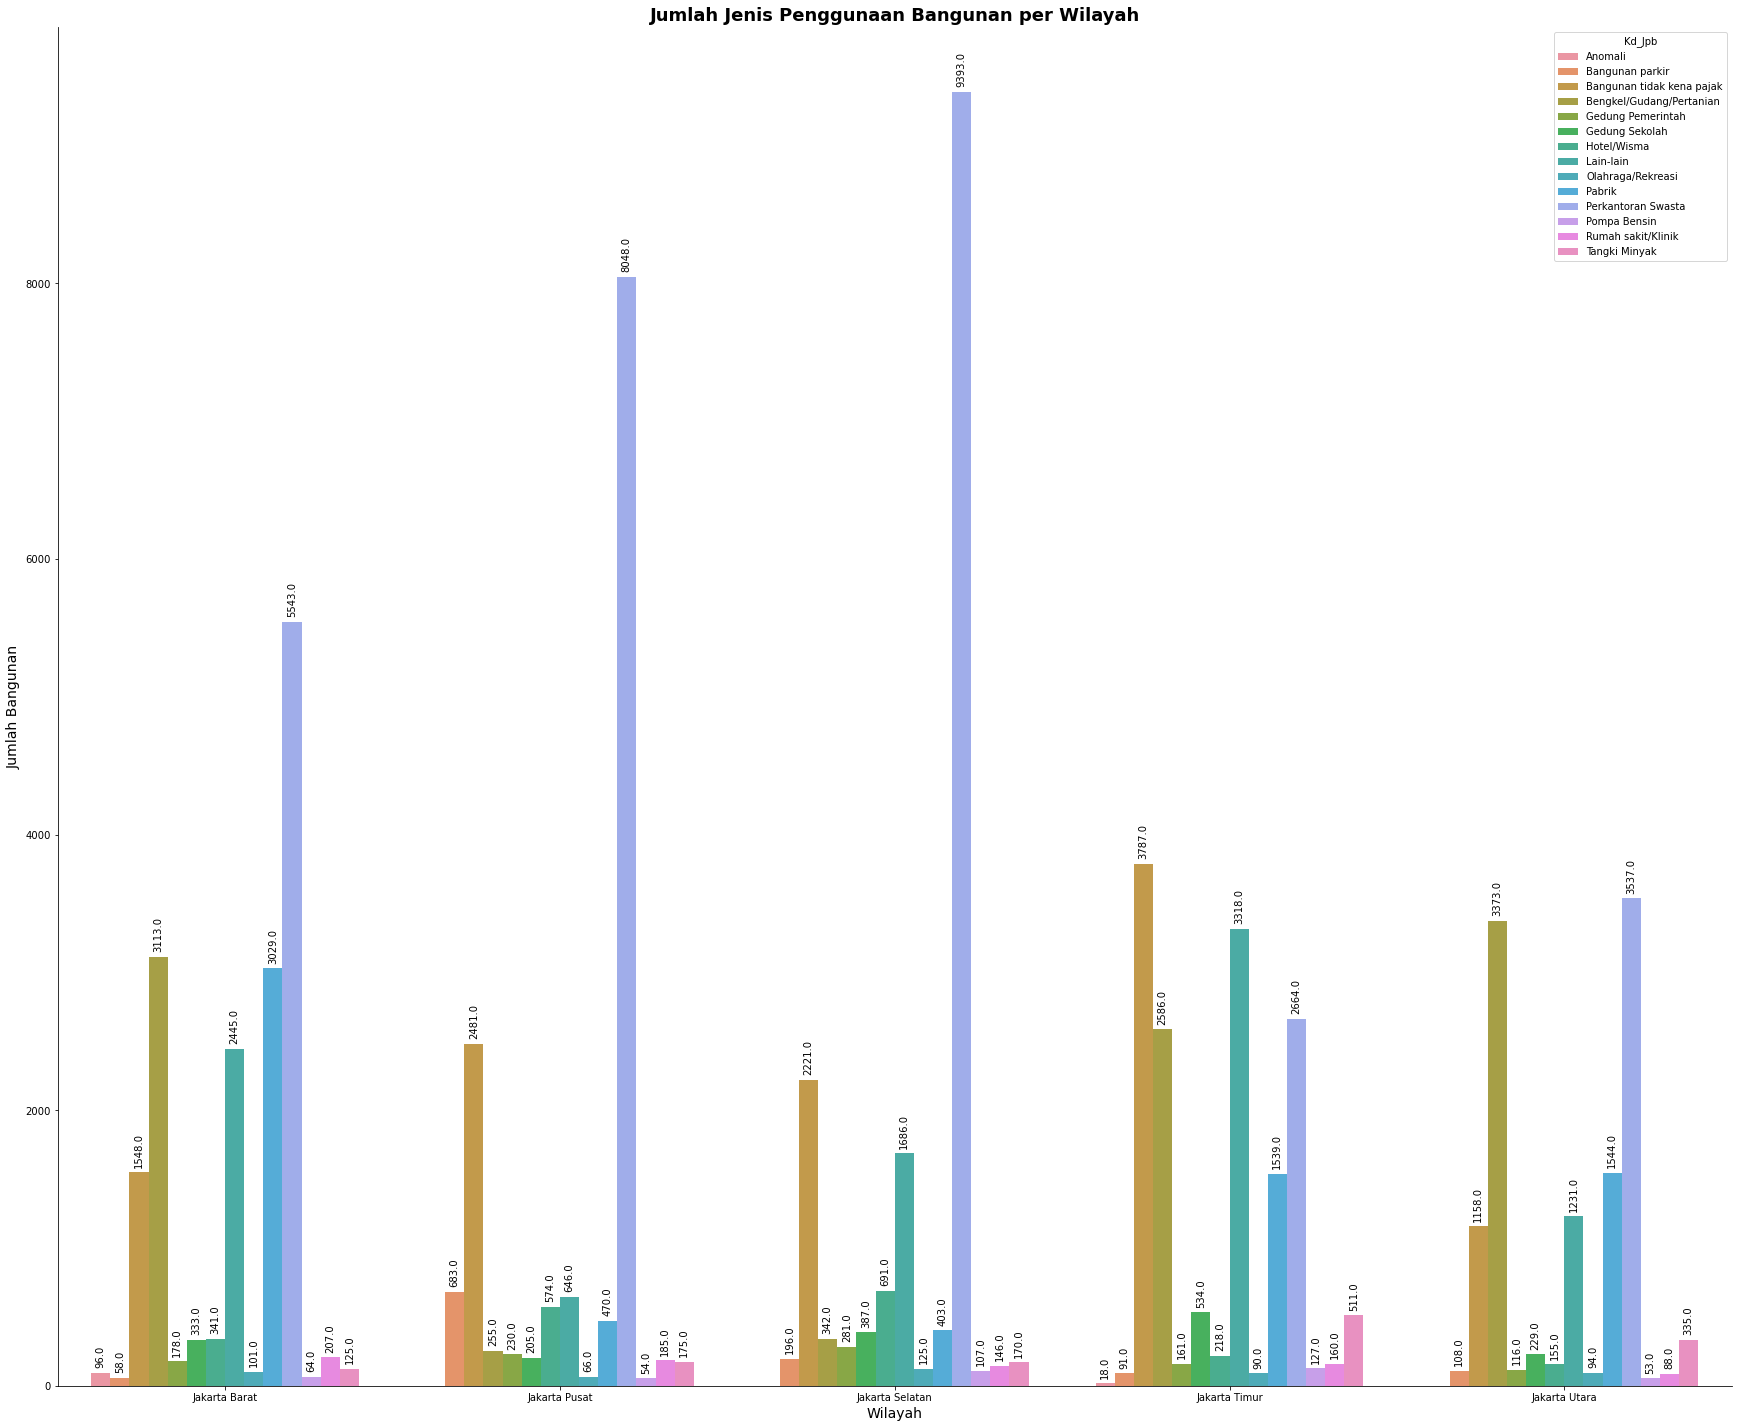

In [30]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(30, 25))

# grouped barplot
bx = sns.barplot(
    x="Kd_Dati2", 
    y="jpb_count", 
    hue="Kd_Jpb", 
    data=nontok, 
    ci=None
    )

# Customize the axes and title
bx.set_title("Jumlah Jenis Penggunaan Bangunan per Wilayah", fontsize='18', fontweight='bold')
bx.set_xlabel("Wilayah", fontsize='14')
bx.set_ylabel("Jumlah Bangunan", fontsize='14')

# Remove top and right borders
bx.spines['top'].set_visible(False)
bx.spines['right'].set_visible(False)

def add_value_labels(bx, spacing=5):
    for rect in bx.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        bx.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            fontsize='10',
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            rotation = 90,
            horizontalalignment='right',# Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(bx)

# 6. EDA LUAS BANGUNAN

**A. Penentuan batas atas dan batas bawah data outlier**

In [68]:
# Penentuan Q1 Q3

# calculate Q1 and Q3
Q1 = op_bang['Luas_Bng'].quantile(0.25)
Q3 = op_bang['Luas_Bng'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

print(IQR, ',', Q1, ',dan', Q3)

88.0 , 40.0 ,dan 128.0


In [43]:
batas_bawah = (Q1-1.5*IQR) 
batas_atas = (Q3+1.5*IQR)

print('Batas Bawah : ', batas_bawah)
print('Batas Atas : ', batas_atas)

Batas Bawah :  -92.0
Batas Atas :  260.0


In [44]:
nilai_max = np.max(op_bang['Luas_Bng'])
nilai_min = np.min(op_bang['Luas_Bng'])

print(nilai_min, ',', nilai_max)

0 , 20211006033


In [45]:
if (nilai_min < batas_bawah):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > batas_atas):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Tidak ditemukan low outlier!
Ditemukan high outlier!


In [70]:
no_out = op_bang[~((op_bang['Luas_Bng'] < (Q1 - 1.5 * IQR)) |(op_bang['Luas_Bng'] > (Q3 + 1.5 * IQR)))]
no_out

,OBJECTID,Jml_Lantai_Bng,Jns_Atap_Bng,Jns_Konstruksi_Bng,Jns_Transaksi_Bng,Kd_Blok,Kd_Dati2,Kd_Dinding,Kd_Jns_Op,Kd_Jpb,...,No_Bng,No_Formulir_Lspop,No_Urut,Thn_Dibangun_Bng,Thn_Renovasi_Bng,Tgl_Pemeriksaan_Bng__YEAR_,Tgl_Pendataan_Bng__YEAR_,Tgl_Perekaman_Bng__YEAR_,NOP,Ket_Lan
0,1,-4,1.0,3.0,1,4,Jakarta Timur,3.0,0,Perumahan,...,1,20212000095,943,2005,NaN,2021.0,2021.0,2021.0,317202000100409430,Bangunan Basement
1,2,-2,3.0,2.0,2,30,Jakarta Timur,3.0,0,Perumahan,...,1,20080112195,135,1996,NaN,2008.0,2008.0,2008.0,317206000103001350,Bangunan Basement
2,3,-2,4.0,3.0,1,1,Jakarta Timur,3.0,0,Perumahan,...,1,20202001082,846,2019,NaN,2020.0,2020.0,2020.0,317202000100108460,Bangunan Basement
3,4,-1,1.0,2.0,1,10,Jakarta Selatan,3.0,0,Perumahan,...,1,20210007772,918,2021,NaN,2021.0,2021.0,2021.0,317103100301009180,Bangunan Basement
4,5,-1,3.0,2.0,1,11,Jakarta Timur,3.0,0,Perumahan,...,1,20202001137,486,2004,NaN,2021.0,2020.0,2021.0,317202000301104860,Bangunan Basement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072581,2072582,270,1.0,2.0,2,21,Jakarta Pusat,2.0,0,Apartemen,...,1,20090002011,78,1998,NaN,2009.0,2009.0,2009.0,317301000302100780,Bangunan Tingkat > 69
2072582,2072583,393,1.0,2.0,1,14,Jakarta Pusat,2.0,0,Apartemen,...,1,20120002561,785,2012,NaN,2012.0,2012.0,2012.0,317301000301407850,Bangunan Tingkat > 69
2072583,2072584,393,1.0,2.0,1,14,Jakarta Pusat,2.0,0,Apartemen,...,1,20120002555,779,2012,NaN,2012.0,2012.0,2012.0,317301000301407790,Bangunan Tingkat > 69
2072584,2072585,900,3.0,3.0,2,7,Jakarta Barat,3.0,0,Perumahan,...,1,20010041083,79,1990,NaN,2001.0,2001.0,2001.0,317404000200700790,Bangunan Tingkat > 69


In [51]:
nilai_max = np.max(no_out['Luas_Bng'])
nilai_min = np.min(no_out['Luas_Bng'])

print(nilai_min, ',', nilai_max)

0 , 260


**B. Penentuan interval luas bangunan**

In [52]:
interval = np.linspace(min(no_out['Luas_Bng']), max(no_out['Luas_Bng']), 5)
interval

array([  0.,  65., 130., 195., 260.])

**C. Grouping dan pengelompokan data luas bangunan**

In [71]:
interval = [0.,  65., 130., 195., 260.]
kategori = ['Kurang dari 65 m2', 'Antara 66 s/d 130 m2', 'Antara 131 s/d 195 m2', 'Antara 196 s/d 260 m2']
no_out['Ket_Luas'] = pd.cut(no_out['Luas_Bng'], bins=interval, labels=kategori)
no_out[['Luas_Bng', 'Ket_Luas']]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8776\848103920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out['Ket_Luas'] = pd.cut(no_out['Luas_Bng'], bins=interval, labels=kategori)


,Luas_Bng,Ket_Luas
0,81,Antara 66 s/d 130 m2
1,200,Antara 196 s/d 260 m2
2,89,Antara 66 s/d 130 m2
3,130,Antara 66 s/d 130 m2
4,201,Antara 196 s/d 260 m2
...,...,...
2072581,130,Antara 66 s/d 130 m2
2072582,73,Antara 66 s/d 130 m2
2072583,85,Antara 66 s/d 130 m2
2072584,51,Kurang dari 65 m2


In [72]:
ketluas_count = no_out.groupby(['Kd_Dati2', 'Ket_Luas']).size().reset_index(name='ketluas_count')
ketluas_count

,Kd_Dati2,Ket_Luas,ketluas_count
0,Jakarta Barat,Kurang dari 65 m2,204661
1,Jakarta Barat,Antara 66 s/d 130 m2,142682
2,Jakarta Barat,Antara 131 s/d 195 m2,56566
3,Jakarta Barat,Antara 196 s/d 260 m2,32659
4,Jakarta Pusat,Kurang dari 65 m2,163886
5,Jakarta Pusat,Antara 66 s/d 130 m2,56361
6,Jakarta Pusat,Antara 131 s/d 195 m2,21189
7,Jakarta Pusat,Antara 196 s/d 260 m2,13982
8,Jakarta Selatan,Kurang dari 65 m2,187494
9,Jakarta Selatan,Antara 66 s/d 130 m2,137250


**D. EDA luas bangunan berupa bar plot**

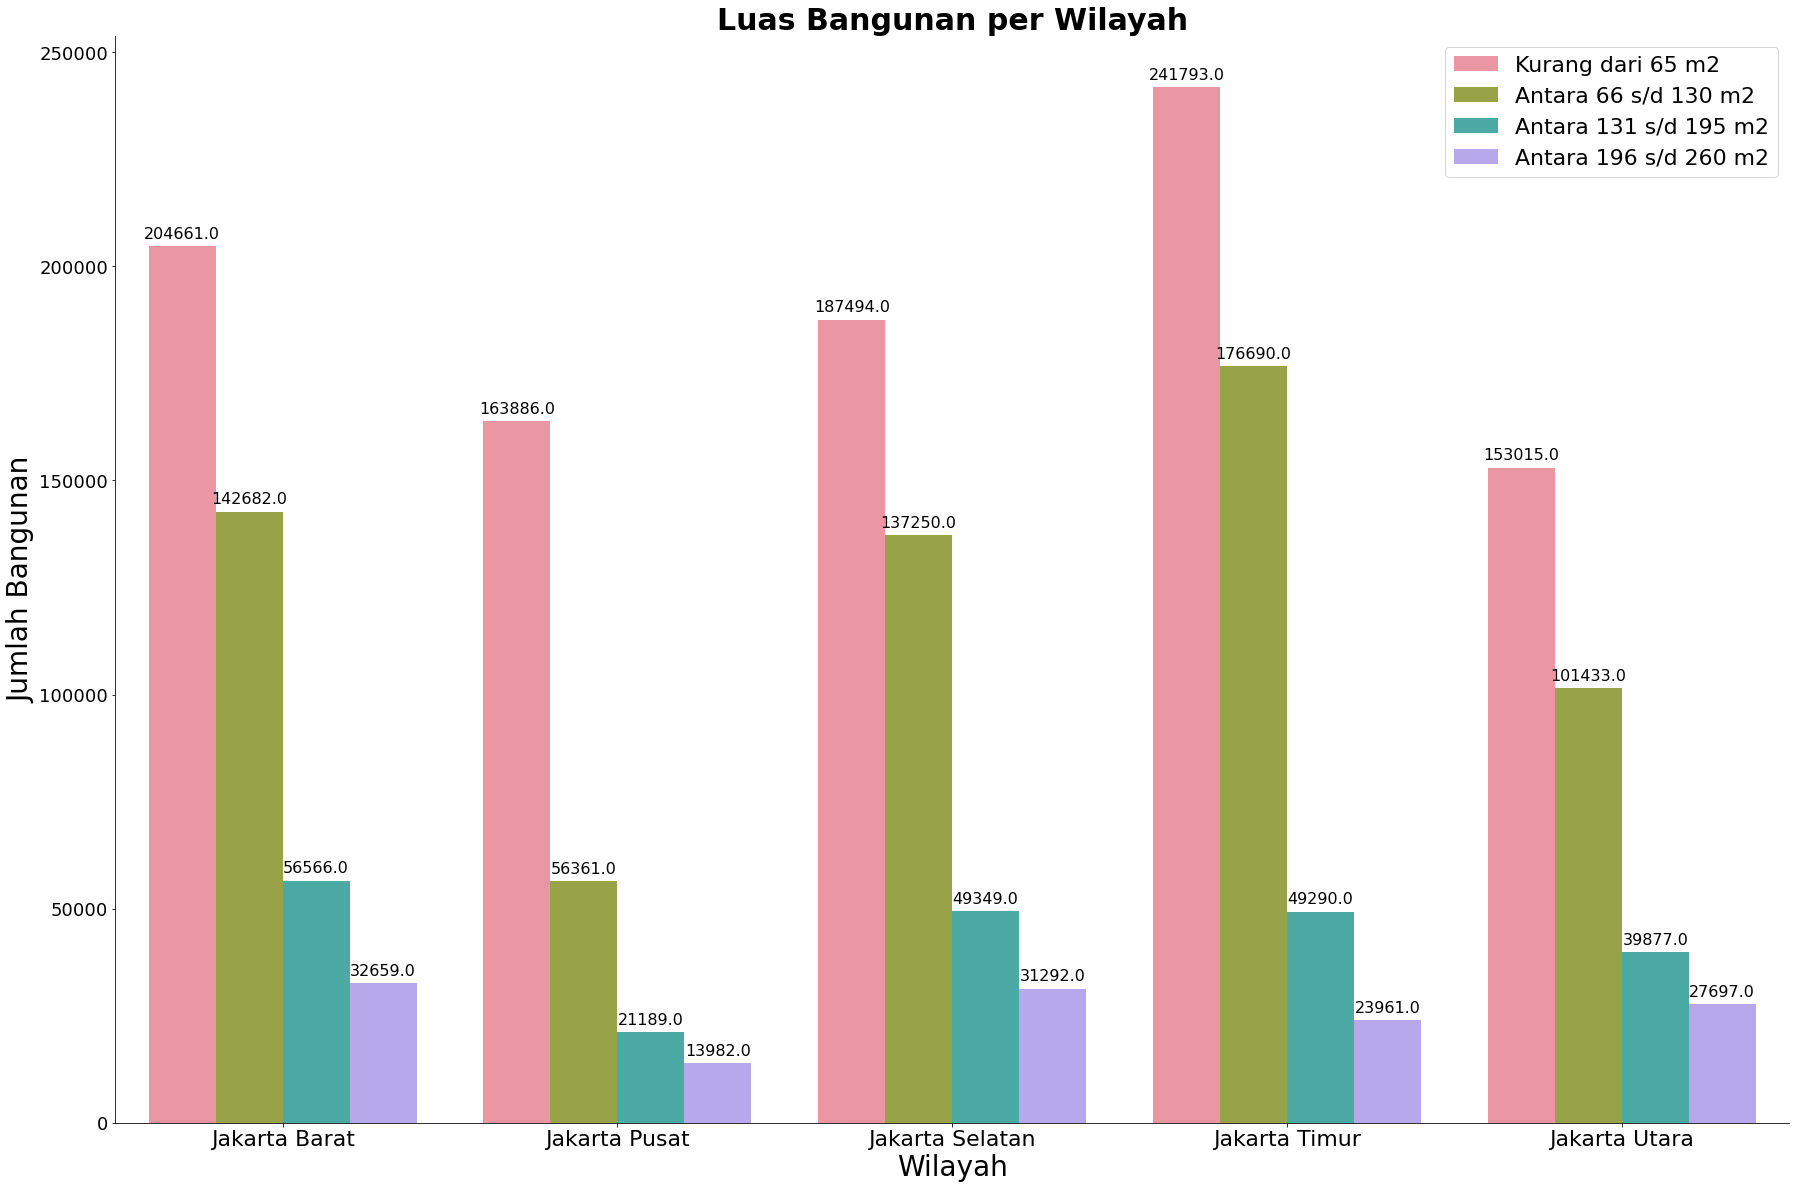

In [81]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(30, 20))

# grouped barplot
ax = sns.barplot(
    x="Kd_Dati2", 
    y="ketluas_count", 
    hue="Ket_Luas", 
    data=ketluas_count,
    ci=None
    )

# Customize the axes and title
ax.set_title("Luas Bangunan per Wilayah", fontsize='30', fontweight='bold')
ax.set_xlabel("Wilayah", fontsize='28')
ax.set_ylabel("Jumlah Bangunan", fontsize='28')

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 18)

plt.legend(fontsize = 22)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            fontsize='16',
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            rotation = 0,
            horizontalalignment='right',# Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# 7. EDA TAHUN DIBANGUN DAN TAHUN RENOVASI

**A. Subset dan eliminasi outlier tahun dibangun dan tahun renovasi**

In [ ]:
thn_bangun = op_bang.loc[(op_bang['Thn_Dibangun_Bng']>=1640) & (op_bang['Thn_Dibangun_Bng']<=2022)]
thn_bangun[['OBJECTID', 'NOP', 'Jml_Lantai_Bng', 'Kd_Jpb', 'Thn_Dibangun_Bng', 'Thn_Renovasi_Bng', 'Tgl_Pemeriksaan_Bng__YEAR_', 'Tgl_Pendataan_Bng__YEAR_', 'Tgl_Perekaman_Bng__YEAR_']]

In [4]:
thn_renov = thn_bangun.loc[(thn_bangun['Thn_Renovasi_Bng'].isnull()) | ((thn_bangun['Thn_Renovasi_Bng']>=1640) & (thn_bangun['Thn_Renovasi_Bng']<=2022))]
thn_renov[['Thn_Dibangun_Bng', 'Kd_Jpb', 'Thn_Renovasi_Bng']]

,Thn_Dibangun_Bng,Kd_Jpb,Thn_Renovasi_Bng
0,2005,1,NaN
1,1996,1,NaN
2,2019,1,NaN
3,2021,1,NaN
4,2004,1,NaN
...,...,...,...
2072581,1998,13,NaN
2072582,2012,13,NaN
2072583,2012,13,NaN
2072584,1990,1,NaN


In [5]:
thn_renov['Thn_Dibangun_Bng'].isnull().values.any()

False

**B. Pengecekan selisih tahun dibangun dengan tahun renovasi**

In [6]:
thn_renov['Cek_Gap'] = thn_renov['Thn_Renovasi_Bng'] - thn_renov['Thn_Dibangun_Bng']
thn_renov[['Thn_Dibangun_Bng', 'Thn_Renovasi_Bng', 'Cek_Gap']]

thn_renov['Cek_Gap'].value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12088\1363817434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thn_renov['Cek_Gap'] = thn_renov['Thn_Renovasi_Bng'] - thn_renov['Thn_Dibangun_Bng']


-68.0     1
-55.0     1
-48.0     1
-45.0     1
-40.0     1
         ..
 301.0    1
 321.0    1
 329.0    1
 330.0    1
 355.0    1
Name: Cek_Gap, Length: 169, dtype: int64

**C. Manipulasi data tahun renovasi (gap tahun minus) dengan penukaran dengan tahun dibangun**

In [7]:
thn_renov['Thn_Dibangun_Bng_1'] = np.where(thn_renov['Cek_Gap']<0, thn_renov['Thn_Renovasi_Bng'], thn_renov['Thn_Dibangun_Bng'])
thn_renov['Thn_Renovasi_Bng_1'] = np.where(thn_renov['Cek_Gap']<0, thn_renov['Thn_Dibangun_Bng'], thn_renov['Thn_Renovasi_Bng'])

thn_renov[['Thn_Dibangun_Bng_1', 'Thn_Renovasi_Bng_1', 'Thn_Dibangun_Bng', 'Thn_Renovasi_Bng']]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12088\1733522013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thn_renov['Thn_Dibangun_Bng_1'] = np.where(thn_renov['Cek_Gap']<0, thn_renov['Thn_Renovasi_Bng'], thn_renov['Thn_Dibangun_Bng'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12088\1733522013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thn_renov['Thn_Renovasi_Bng_1'] = np.where(thn_renov['Cek_Gap']<0, thn_renov['Thn_Dibangun_Bng'], thn_renov['Thn_Renovasi_Bng'])


,Thn_Dibangun_Bng_1,Thn_Renovasi_Bng_1,Thn_Dibangun_Bng,Thn_Renovasi_Bng
0,2005.0,NaN,2005,NaN
1,1996.0,NaN,1996,NaN
2,2019.0,NaN,2019,NaN
3,2021.0,NaN,2021,NaN
4,2004.0,NaN,2004,NaN
...,...,...,...,...
2072581,1998.0,NaN,1998,NaN
2072582,2012.0,NaN,2012,NaN
2072583,2012.0,NaN,2012,NaN
2072584,1990.0,NaN,1990,NaN


In [8]:
thn_renov = thn_renov.drop('Thn_Dibangun_Bng',1)
thn_renov = thn_renov.drop('Thn_Renovasi_Bng',1)
thn_renov = thn_renov.drop('Cek_Gap',1)

thn_renov.rename(columns = {'Thn_Dibangun_Bng_1':'Thn_Dibangun_Bng', 'Thn_Renovasi_Bng_1':'Thn_Renovasi_Bng', 'Cek_Gap_1':'Cek_Gap'}, inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12088\819865895.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  thn_renov = thn_renov.drop('Thn_Dibangun_Bng',1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12088\819865895.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  thn_renov = thn_renov.drop('Thn_Renovasi_Bng',1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12088\819865895.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  thn_renov = thn_renov.drop('Cek_Gap',1)


In [9]:
thn_renov['Cek_Gap'] = thn_renov['Thn_Renovasi_Bng'] - thn_renov['Thn_Dibangun_Bng']
thn_renov[['Thn_Dibangun_Bng', 'Thn_Renovasi_Bng', 'Cek_Gap']]

thn_renov['Cek_Gap'].value_counts().sort_index()

0.0      21549
1.0      13351
2.0       9543
3.0      10468
4.0      21701
         ...  
301.0        1
321.0        1
329.0        1
330.0        1
355.0        1
Name: Cek_Gap, Length: 136, dtype: int64

In [11]:
exp = thn_renov[['Thn_Dibangun_Bng', 'Thn_Renovasi_Bng', 'Tgl_Pendataan_Bng__YEAR_', 'Tgl_Pemeriksaan_Bng__YEAR_', 'Tgl_Perekaman_Bng__YEAR_']]
exp

,Thn_Dibangun_Bng,Thn_Renovasi_Bng,Tgl_Pendataan_Bng__YEAR_,Tgl_Pemeriksaan_Bng__YEAR_,Tgl_Perekaman_Bng__YEAR_
0,2005.0,NaN,2021.0,2021.0,2021.0
1,1996.0,NaN,2008.0,2008.0,2008.0
2,2019.0,NaN,2020.0,2020.0,2020.0
3,2021.0,NaN,2021.0,2021.0,2021.0
4,2004.0,NaN,2020.0,2021.0,2021.0
...,...,...,...,...,...
2072581,1998.0,NaN,2009.0,2009.0,2009.0
2072582,2012.0,NaN,2012.0,2012.0,2012.0
2072583,2012.0,NaN,2012.0,2012.0,2012.0
2072584,1990.0,NaN,2001.0,2001.0,2001.0


**D. Export dan import data hasil manipulasi**

In [14]:
exp.to_csv('C:/Users/ASUS/Documents/Sabila Haq/Data OP Bangunan (Tahun).csv')
print('Selesai')

Selesai


In [15]:
sat = pd.read_csv('C:/Users/ASUS/Documents/Sabila Haq/Data OP Bangunan (Tahun).csv')
sat

,Unnamed: 0,Thn_Dibangun_Bng,Thn_Renovasi_Bng,Tgl_Pendataan_Bng__YEAR_,Tgl_Pemeriksaan_Bng__YEAR_,Tgl_Perekaman_Bng__YEAR_
0,0,2005.0,NaN,2021.0,2021.0,2021.0
1,1,1996.0,NaN,2008.0,2008.0,2008.0
2,2,2019.0,NaN,2020.0,2020.0,2020.0
3,3,2021.0,NaN,2021.0,2021.0,2021.0
4,4,2004.0,NaN,2020.0,2021.0,2021.0
...,...,...,...,...,...,...
2038829,2072581,1998.0,NaN,2009.0,2009.0,2009.0
2038830,2072582,2012.0,NaN,2012.0,2012.0,2012.0
2038831,2072583,2012.0,NaN,2012.0,2012.0,2012.0
2038832,2072584,1990.0,NaN,2001.0,2001.0,2001.0


In [17]:
sat['Cek_Gap'] = sat['Thn_Renovasi_Bng'] - sat['Thn_Dibangun_Bng']
sat[['Thn_Dibangun_Bng', 'Thn_Renovasi_Bng', 'Cek_Gap']]

sat['Cek_Gap'].value_counts().sort_index()

0.0      21549
1.0      13351
2.0       9543
3.0      10468
4.0      21701
         ...  
301.0        1
321.0        1
329.0        1
330.0        1
355.0        1
Name: Cek_Gap, Length: 136, dtype: int64

**E. Penentuan interval dan grouping tahun dibangun**

In [21]:
interval_b = [1640., 1980., 1990., 2000., 2010., 2022.]
kategorik = ['Kurang dari 1980','Antara 1981 s/d 1990', 'Antara 1991 s/d 2000', 'Antara 2001 s/d 2010', 'Diatas dari 2011']
thn_renov['Ket_Thn_B'] = pd.cut(thn_renov['Thn_Dibangun_Bng'], bins=interval_b, labels=kategorik)

thn_renov[['Ket_Thn_B', 'Kd_Jpb', 'Thn_Dibangun_Bng']]

,Ket_Thn_B,Kd_Jpb,Thn_Dibangun_Bng
0,Antara 2001 s/d 2010,Perumahan,2005.0
1,Antara 1991 s/d 2000,Perumahan,1996.0
2,Diatas dari 2011,Perumahan,2019.0
3,Diatas dari 2011,Perumahan,2021.0
4,Antara 2001 s/d 2010,Perumahan,2004.0
...,...,...,...
2072581,Antara 1991 s/d 2000,Apartemen,1998.0
2072582,Diatas dari 2011,Apartemen,2012.0
2072583,Diatas dari 2011,Apartemen,2012.0
2072584,Antara 1981 s/d 1990,Perumahan,1990.0


In [22]:
group = thn_renov.groupby(['Kd_Jpb', 'Ket_Thn_B']).size().reset_index(name='count')
group

,Kd_Jpb,Ket_Thn_B,count
0,Apartemen,Kurang dari 1980,15
1,Apartemen,Antara 1981 s/d 1990,1127
2,Apartemen,Antara 1991 s/d 2000,29576
3,Apartemen,Antara 2001 s/d 2010,86036
4,Apartemen,Diatas dari 2011,70732
...,...,...,...
75,Toko/Apotek/Pasar/Ruko,Kurang dari 1980,44374
76,Toko/Apotek/Pasar/Ruko,Antara 1981 s/d 1990,41019
77,Toko/Apotek/Pasar/Ruko,Antara 1991 s/d 2000,44442
78,Toko/Apotek/Pasar/Ruko,Antara 2001 s/d 2010,101520


In [23]:
y1 = group.loc[group['Kd_Jpb']=='Apartemen']
y2 = group.loc[group['Kd_Jpb']=='Bangunan parkir']
y3 = group.loc[group['Kd_Jpb']=='Bangunan tidak kena pajak']
y4 = group.loc[group['Kd_Jpb']=='Bengkel/Gudang/Pertanian']
y5 = group.loc[group['Kd_Jpb']=='Gedung Pemerintah']
y6 = group.loc[group['Kd_Jpb']=='Gedung Sekolah']
y7 = group.loc[group['Kd_Jpb']=='Hotel/Wisma']
y8 = group.loc[group['Kd_Jpb']=='Lain-lain']
y9 = group.loc[group['Kd_Jpb']=='Olahraga/Rekreasi']
y10 = group.loc[group['Kd_Jpb']=='Pabrik']
y11 = group.loc[group['Kd_Jpb']=='Perkantoran Swasta']
y12 = group.loc[group['Kd_Jpb']=='Pompa Bensin']
y13 = group.loc[group['Kd_Jpb']=='Rumah sakit/Klinik']
y14 = group.loc[group['Kd_Jpb']=='Tangki Minyak']
y15 = group.loc[group['Kd_Jpb']=='Toko/Apotek/Pasar/Ruko']
y16 = group.loc[group['Kd_Jpb']=='Perumahan']

**F. EDA tahun dibangun berupa line plot**

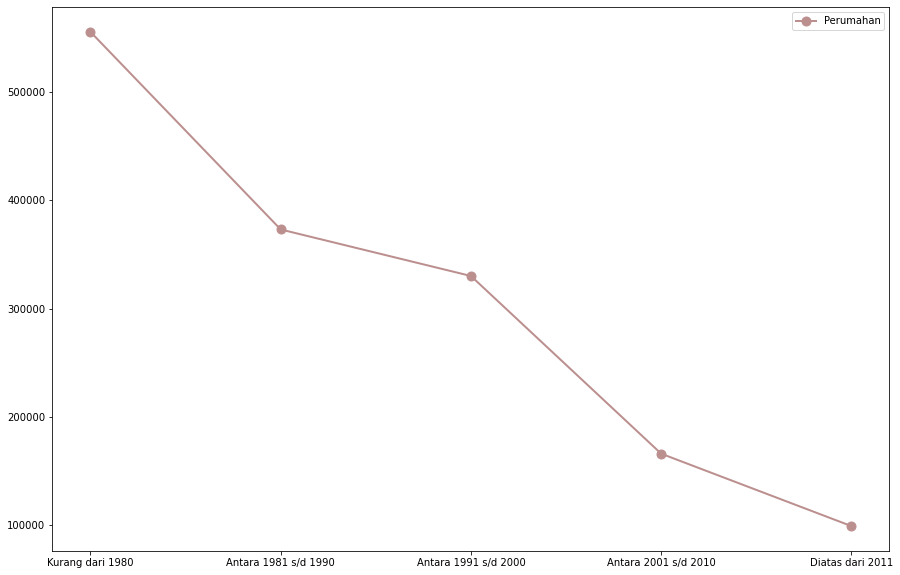

In [24]:
# Set the figure size
plt.figure(figsize=(15, 10))

ax = plt.plot( 'Ket_Thn_B', 'count', data=y16, marker='.', markersize=18, color='rosybrown', linewidth=2, label="Perumahan")

# show legend
plt.legend()

# show graph
plt.show()

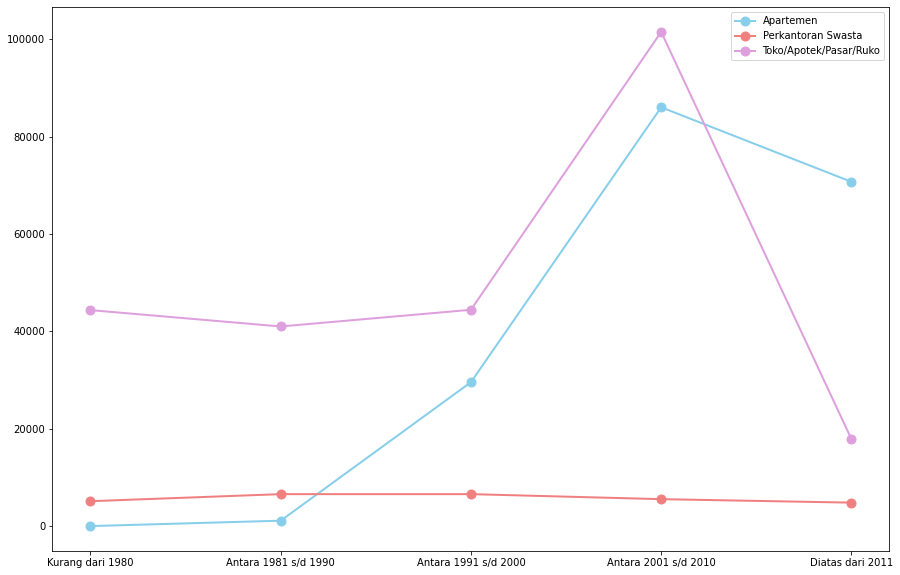

In [25]:
# Set the figure size
plt.figure(figsize=(15, 10))

plt.plot( 'Ket_Thn_B', 'count', data=y1, marker='.', markersize=18, color='skyblue', linewidth=2, label="Apartemen")
plt.plot( 'Ket_Thn_B', 'count', data=y11, marker='.', markersize=18, color='lightcoral', linewidth=2, label="Perkantoran Swasta")
plt.plot( 'Ket_Thn_B', 'count', data=y15, marker='.', markersize=18, color='plum', linewidth=2, label="Toko/Apotek/Pasar/Ruko")

# show legend
plt.legend()

# show graph
plt.show()

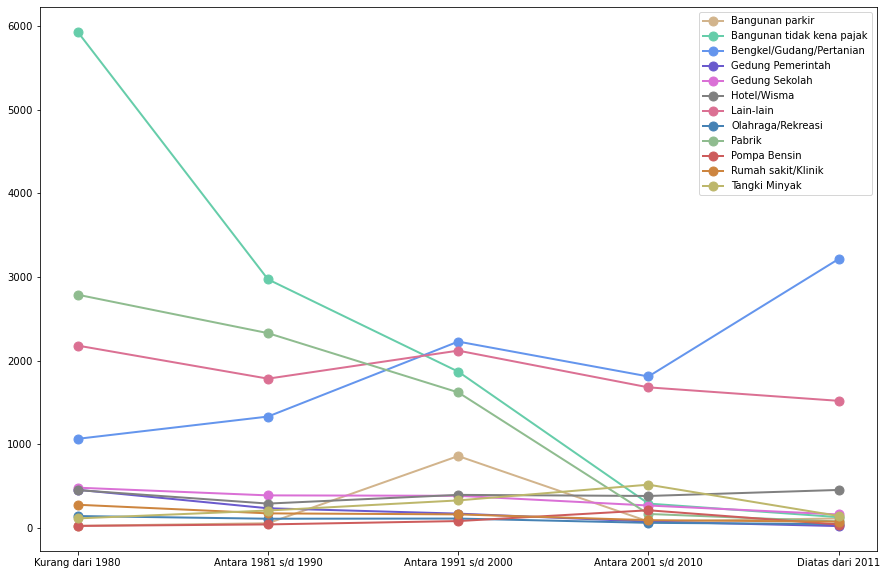

In [26]:
# Set the figure size
plt.figure(figsize=(15, 10))

plt.plot( 'Ket_Thn_B', 'count', data=y2, marker='.', markersize=18, color='tan', linewidth=2, label="Bangunan parkir")
plt.plot( 'Ket_Thn_B', 'count', data=y3, marker='.', markersize=18, color='mediumaquamarine', linewidth=2, label="Bangunan tidak kena pajak")
plt.plot( 'Ket_Thn_B', 'count', data=y4, marker='.', markersize=18, color='cornflowerblue', linewidth=2, label="Bengkel/Gudang/Pertanian")
plt.plot( 'Ket_Thn_B', 'count', data=y5, marker='.', markersize=18, color='slateblue', linewidth=2, label="Gedung Pemerintah")
plt.plot( 'Ket_Thn_B', 'count', data=y6, marker='.', markersize=18, color='orchid', linewidth=2, label="Gedung Sekolah")
plt.plot( 'Ket_Thn_B', 'count', data=y7, marker='.', markersize=18, color='grey', linewidth=2, label="Hotel/Wisma")
plt.plot( 'Ket_Thn_B', 'count', data=y8, marker='.', markersize=18, color='palevioletred', linewidth=2, label="Lain-lain")
plt.plot( 'Ket_Thn_B', 'count', data=y9, marker='.', markersize=18, color='steelblue', linewidth=2, label="Olahraga/Rekreasi")
plt.plot( 'Ket_Thn_B', 'count', data=y10, marker='.', markersize=18, color='darkseagreen', linewidth=2, label="Pabrik")
plt.plot( 'Ket_Thn_B', 'count', data=y12, marker='.', markersize=18, color='indianred', linewidth=2, label="Pompa Bensin")
plt.plot( 'Ket_Thn_B', 'count', data=y13, marker='.', markersize=18, color='peru', linewidth=2, label="Rumah sakit/Klinik")
plt.plot( 'Ket_Thn_B', 'count', data=y14, marker='.', markersize=18, color='darkkhaki', linewidth=2, label="Tangki Minyak")

# show legend
plt.legend()

# show graph
plt.show()

**G. Penentuan interval dan grouping tahun renovasi**

In [27]:
interval_r = [1738., 1980., 1990., 2000., 2010., 2022.]
kategori = ['Kurang dari 1980','Antara 1981 s/d 1990', 'Antara 1991 s/d 2000', 'Antara 2001 s/d 2010', 'Diatas dari 2011']
thn_renov['Ket_Thn_R'] = pd.cut(thn_renov['Thn_Renovasi_Bng'], bins=interval_r, labels=kategori)

In [28]:
thn_renov['Ket_Thn_R'].value_counts().sort_index()

Kurang dari 1980         48572
Antara 1981 s/d 1990     85617
Antara 1991 s/d 2000    133490
Antara 2001 s/d 2010     87566
Diatas dari 2011         38357
Name: Ket_Thn_R, dtype: int64

In [29]:
group_1 = thn_renov.groupby(['Kd_Jpb', 'Ket_Thn_R']).size().reset_index(name='count_1')
group_1

,Kd_Jpb,Ket_Thn_R,count_1
0,Apartemen,Kurang dari 1980,1
1,Apartemen,Antara 1981 s/d 1990,18
2,Apartemen,Antara 1991 s/d 2000,66
3,Apartemen,Antara 2001 s/d 2010,3580
4,Apartemen,Diatas dari 2011,3166
...,...,...,...
75,Toko/Apotek/Pasar/Ruko,Kurang dari 1980,984
76,Toko/Apotek/Pasar/Ruko,Antara 1981 s/d 1990,6628
77,Toko/Apotek/Pasar/Ruko,Antara 1991 s/d 2000,6509
78,Toko/Apotek/Pasar/Ruko,Antara 2001 s/d 2010,14517


In [30]:
ya = group_1.loc[group_1['Kd_Jpb']=='Apartemen']
yb = group_1.loc[group_1['Kd_Jpb']=='Bangunan parkir']
yc = group_1.loc[group_1['Kd_Jpb']=='Bangunan tidak kena pajak']
yd = group_1.loc[group_1['Kd_Jpb']=='Bengkel/Gudang/Pertanian']
ye = group_1.loc[group_1['Kd_Jpb']=='Gedung Pemerintah']
yf = group_1.loc[group_1['Kd_Jpb']=='Gedung Sekolah']
yg = group_1.loc[group_1['Kd_Jpb']=='Hotel/Wisma']
yh = group_1.loc[group_1['Kd_Jpb']=='Lain-lain']
yi = group_1.loc[group_1['Kd_Jpb']=='Olahraga/Rekreasi']
yj = group_1.loc[group_1['Kd_Jpb']=='Pabrik']
yk = group_1.loc[group_1['Kd_Jpb']=='Perkantoran Swasta']
yl = group_1.loc[group_1['Kd_Jpb']=='Pompa Bensin']
ym = group_1.loc[group_1['Kd_Jpb']=='Rumah sakit/Klinik']
yn = group_1.loc[group_1['Kd_Jpb']=='Tangki Minyak']
yo = group_1.loc[group_1['Kd_Jpb']=='Toko/Apotek/Pasar/Ruko']
yp = group_1.loc[group_1['Kd_Jpb']=='Perumahan']

**H. EDA tahun renovasi berupa line plot**

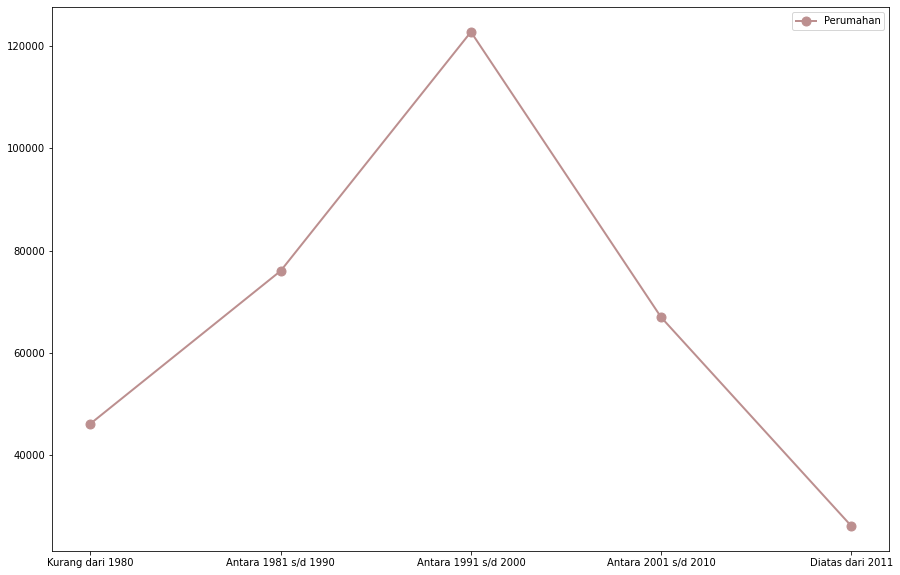

In [31]:
# Set the figure size
plt.figure(figsize=(15, 10))

ax = plt.plot( 'Ket_Thn_R', 'count_1', data=yp, marker='.', markersize=18, color='rosybrown', linewidth=2, label="Perumahan")

# show legend
plt.legend()

# show graph
plt.show()

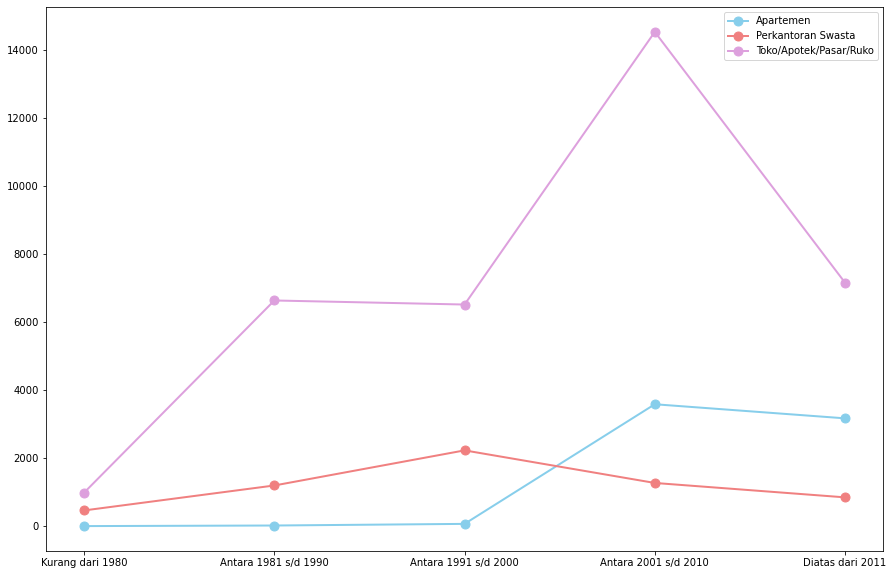

In [32]:
# Set the figure size
plt.figure(figsize=(15, 10))

plt.plot( 'Ket_Thn_R', 'count_1', data=ya, marker='.', markersize=18, color='skyblue', linewidth=2, label="Apartemen")
plt.plot( 'Ket_Thn_R', 'count_1', data=yk, marker='.', markersize=18, color='lightcoral', linewidth=2, label="Perkantoran Swasta")
plt.plot( 'Ket_Thn_R', 'count_1', data=yo, marker='.', markersize=18, color='plum', linewidth=2, label="Toko/Apotek/Pasar/Ruko")

# show legend
plt.legend()

# show graph
plt.show()

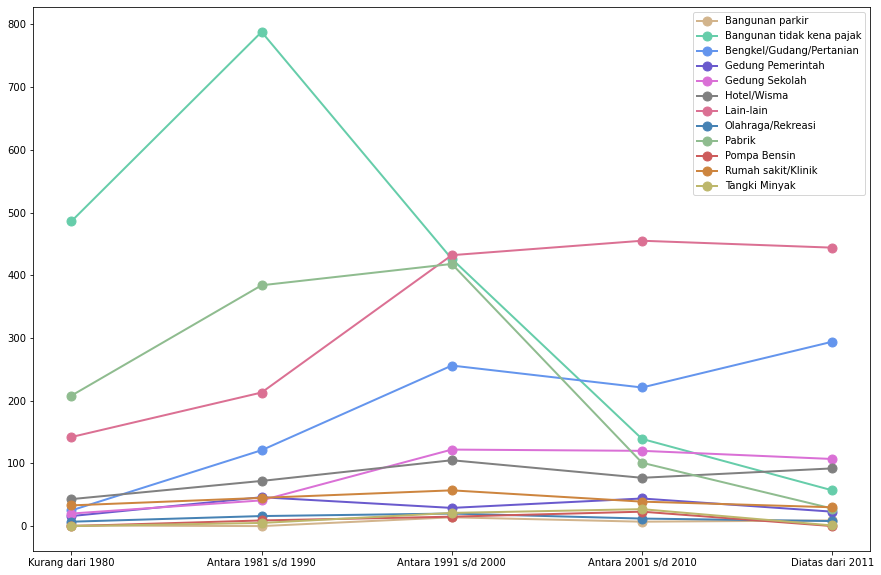

In [33]:
# Set the figure size
plt.figure(figsize=(15, 10))

plt.plot( 'Ket_Thn_R', 'count_1', data=yb, marker='.', markersize=18, color='tan', linewidth=2, label="Bangunan parkir")
plt.plot( 'Ket_Thn_R', 'count_1', data=yc, marker='.', markersize=18, color='mediumaquamarine', linewidth=2, label="Bangunan tidak kena pajak")
plt.plot( 'Ket_Thn_R', 'count_1', data=yd, marker='.', markersize=18, color='cornflowerblue', linewidth=2, label="Bengkel/Gudang/Pertanian")
plt.plot( 'Ket_Thn_R', 'count_1', data=ye, marker='.', markersize=18, color='slateblue', linewidth=2, label="Gedung Pemerintah")
plt.plot( 'Ket_Thn_R', 'count_1', data=yf, marker='.', markersize=18, color='orchid', linewidth=2, label="Gedung Sekolah")
plt.plot( 'Ket_Thn_R', 'count_1', data=yg, marker='.', markersize=18, color='grey', linewidth=2, label="Hotel/Wisma")
plt.plot( 'Ket_Thn_R', 'count_1', data=yh, marker='.', markersize=18, color='palevioletred', linewidth=2, label="Lain-lain")
plt.plot( 'Ket_Thn_R', 'count_1', data=yi, marker='.', markersize=18, color='steelblue', linewidth=2, label="Olahraga/Rekreasi")
plt.plot( 'Ket_Thn_R', 'count_1', data=yj, marker='.', markersize=18, color='darkseagreen', linewidth=2, label="Pabrik")
plt.plot( 'Ket_Thn_R', 'count_1', data=yl, marker='.', markersize=18, color='indianred', linewidth=2, label="Pompa Bensin")
plt.plot( 'Ket_Thn_R', 'count_1', data=ym, marker='.', markersize=18, color='peru', linewidth=2, label="Rumah sakit/Klinik")
plt.plot( 'Ket_Thn_R', 'count_1', data=yn, marker='.', markersize=18, color='darkkhaki', linewidth=2, label="Tangki Minyak")

# show legend
plt.legend()

# show graph
plt.show()

**I. EDA gap tahun dibangun dan tahun renovasi JPB perumahan dalam bentuk line plot**

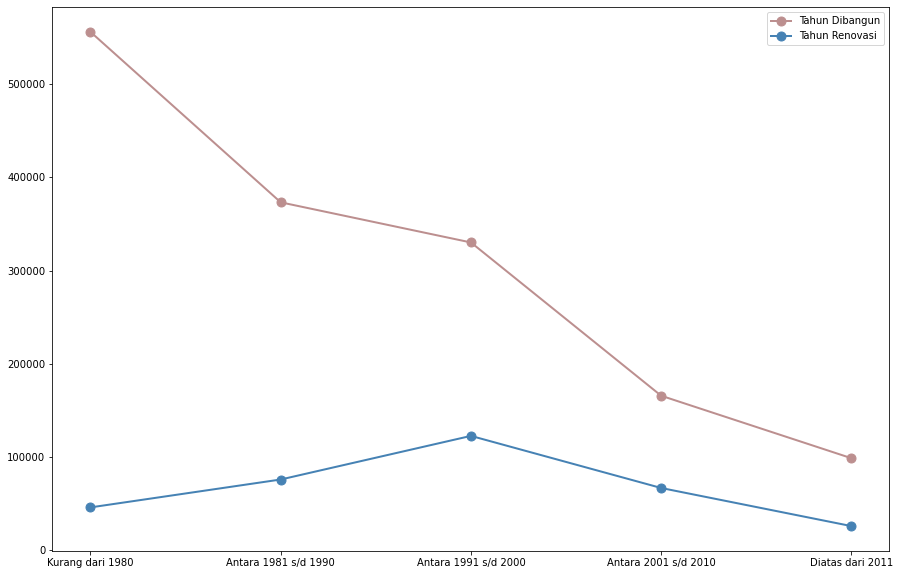

In [34]:
# Set the figure size
plt.figure(figsize=(15, 10))

plt.plot( 'Ket_Thn_B', 'count', data=y16, marker='.', markersize=18, color='rosybrown', linewidth=2, label="Tahun Dibangun")
plt.plot( 'Ket_Thn_R', 'count_1', data=yp, marker='.', markersize=18, color='steelblue', linewidth=2, label="Tahun Renovasi")

# show legend
plt.legend()

# show graph
plt.show()

**J. Crosstab dan EDA tahun dibangun dan tahun renovasi**

In [37]:
craz = pd.crosstab(thn_renov['Ket_Thn_B'], thn_renov['Ket_Thn_R'], dropna=False)#, margins=True)
craz

Ket_Thn_R,Kurang dari 1980,Antara 1981 s/d 1990,Antara 1991 s/d 2000,Antara 2001 s/d 2010,Diatas dari 2011
Ket_Thn_B,,,,,
Kurang dari 1980,48572,68071,73626,24506,5168
Antara 1981 s/d 1990,0,17546,39296,19115,5052
Antara 1991 s/d 2000,0,0,20568,22159,7463
Antara 2001 s/d 2010,0,0,0,21786,14100
Diatas dari 2011,0,0,0,0,6574


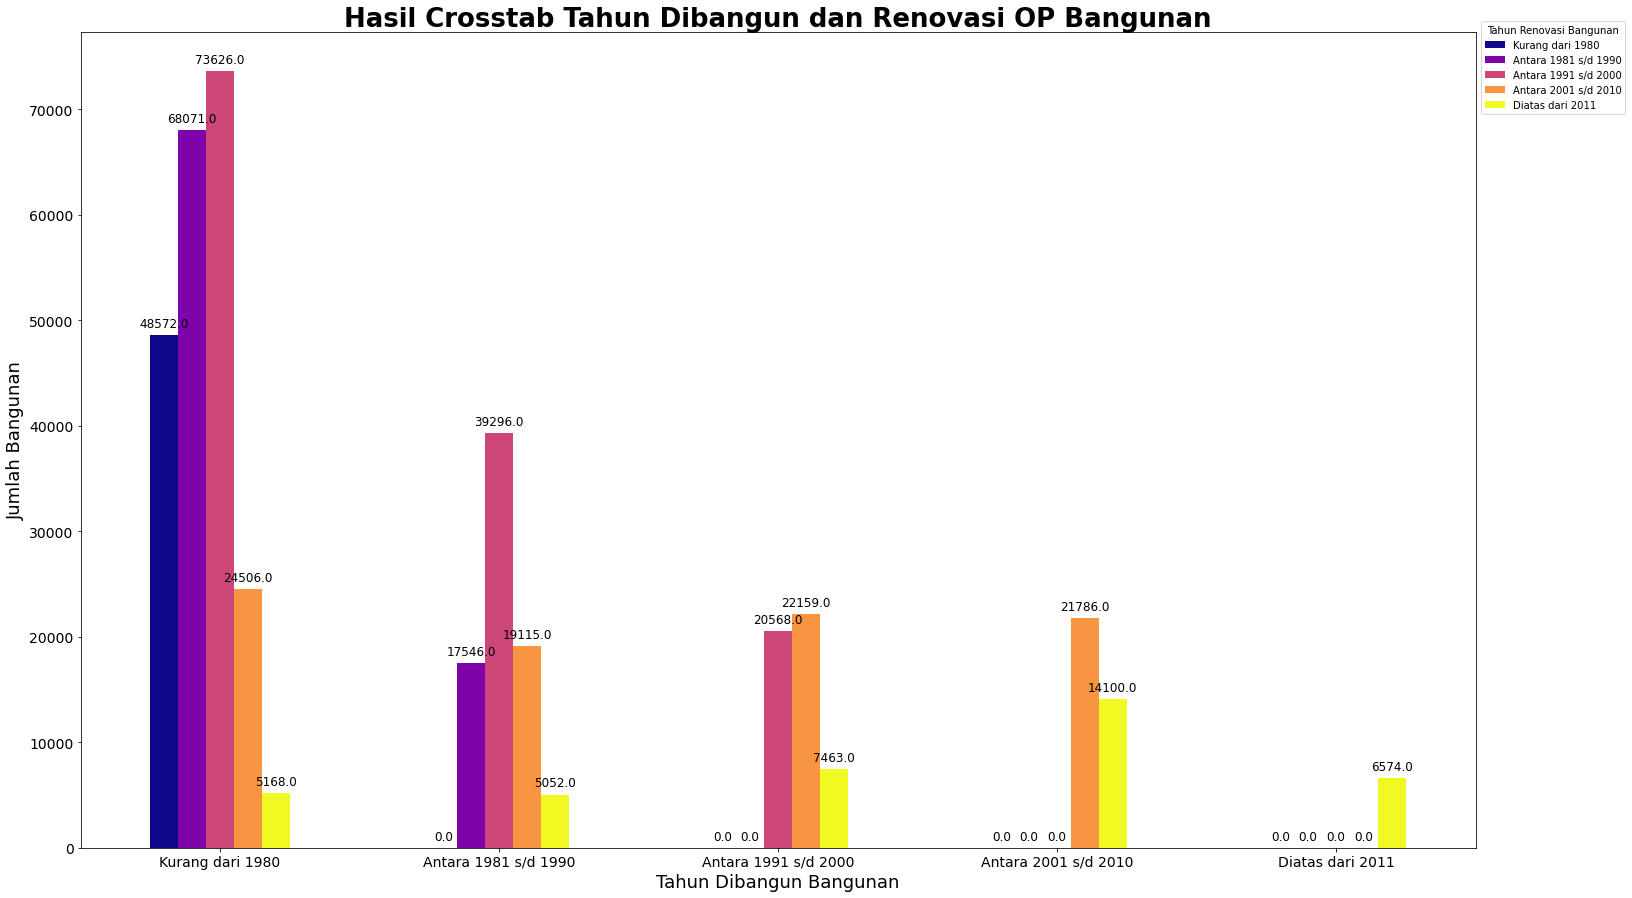

In [38]:
# Bar ploting
ax = craz.plot(kind='bar', rot=0, figsize=(25,15), cmap='plasma')

ax.set_title("Hasil Crosstab Tahun Dibangun dan Renovasi OP Bangunan", fontsize='26', fontweight='bold')
ax.set_xlabel('Tahun Dibangun Bangunan', fontsize = 18)
ax.set_ylabel('Jumlah Bangunan', fontsize = 18)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# ax.legend(title='Tahun Renovasi Bangunan')
ax.legend(title='Tahun Renovasi Bangunan', bbox_to_anchor=(1, 1.02),
         loc='upper left')

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}".format(y_value)

        ax.annotate(
                    label, (x_value, y_value), xytext=(0, space),
                    fontsize='12', textcoords="offset points",
                    ha='center', rotation = 0, horizontalalignment='right', va=va)

add_value_labels(ax)

SELESAI